**1. Khai báo các thư viện sử dụng**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

**2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**3. Khai báo đường dẫn thư mục chứa dữ liệu ảnh**
- Khai báo đường dẫn đến thư mục chứa ảnh để Huấn luyện và Kiểm định mô hình

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/ComputerVision-AmazonGo/Data/Train"
valid_image_files_path = "/content/drive/MyDrive/ComputerVision-AmazonGo/Data/Validation"

**4. Gán nhãn dữ liệu**
- Phân loại ảnh là bài toán học có giám sát, do đó dữ liệu huấn luyện và kiểm định phải được gán nhãn. Ảnh được gán nhãn dựa theo tên thư mục chứa nó, ta có tên và thứ tự các nhãn tương ứng với tên và thứ tự các thư mục chứa ảnh huấn luyện và kiểm định.

In [ ]:
label = ['Bread', 'Soup', 'SeaFood', 'Vegetable-Fruit']

**5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1 / 255)  # đọc và chuẩn hóa dữ liệu ảnh về dạng 0-1
validation_data_gen = ImageDataGenerator(rescale = 1 / 255)

**6. Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,       # Đường dẫn tới ảnh huấn luyện
    target_size = (50, 50),       # Biến đổi các ảnh huấn luyện về cùng 1 kích thước [50x50]
    class_mode = 'categorical')   # Phân loại ảnh đa lớp (4 lớp)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size = (50, 50),
    class_mode = 'categorical')

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


**7. Xây dựng mô hình**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (50, 50, 3)))
model.add(MaxPooling2D(2, 2))

# lớp CNN2
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

# lớp ẩn
model.add(Dense(512, activation = tf.nn.relu))

# lớp output
model.add(Dense(4, activation = tf.nn.softmax)) # 4 đầu ra

**8. Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


**9. Huấn luyện mô hình**

In [ ]:
EPOCHS = 100
history = model.fit(
    train_generator,
    steps_per_epoch = 2,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 2)

Epoch 1/100
2/2 [==============================] - 37s 25s/step - loss: 8.1434 - acc: 0.2188 - val_loss: 2.3495 - val_acc: 0.2656
Epoch 2/100
2/2 [==============================] - 13s 7s/step - loss: 1.9330 - acc: 0.2344 - val_loss: 1.4048 - val_acc: 0.3125
Epoch 3/100
2/2 [==============================] - 13s 7s/step - loss: 1.4318 - acc: 0.3594 - val_loss: 1.4133 - val_acc: 0.2500
Epoch 4/100
2/2 [==============================] - 11s 7s/step - loss: 1.3891 - acc: 0.2344 - val_loss: 1.4023 - val_acc: 0.2500
Epoch 5/100
2/2 [==============================] - 6s 4s/step - loss: 1.4701 - acc: 0.1875 - val_loss: 1.3480 - val_acc: 0.2500
Epoch 6/100
2/2 [==============================] - 5s 3s/step - loss: 1.2624 - acc: 0.3906 - val_loss: 1.4509 - val_acc: 0.3125
Epoch 7/100
2/2 [==============================] - 5s 2s/step - loss: 1.4768 - acc: 0.2812 - val_loss: 1.3490 - val_acc: 0.3281
Epoch 8/100
2/2 [==============================] - 3s 1s/step - loss: 1.2638 - acc: 0.5000 - val_lo

**10. Sử dụng mô hình**

Saving 16.jpg to 16 (1).jpg
[[1. 0. 0. 0.]]
Giá trị dự đoán:  Bread


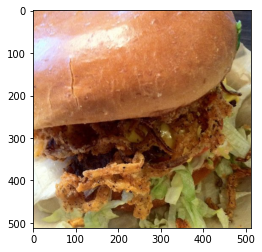

In [17]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  # In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img = image.load_img(path, target_size=(50, 50))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  y_predict = model.predict(images, batch_size = 10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])